### 데이터프레임객체의 plot() 이용 시각화

In [2]:
%matplotlib inline    
import pandas as pd

In [3]:
df = pd.read_excel("./data/남북한발전전력량.xlsx")

In [11]:
df_ns = df.iloc[[0,5], 3: ]  #남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South','North']
df_ns.columns = df_ns.columns.map(int)  #열 이름 자료형을 정수형으로 변경
print(df_ns.head())

       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]


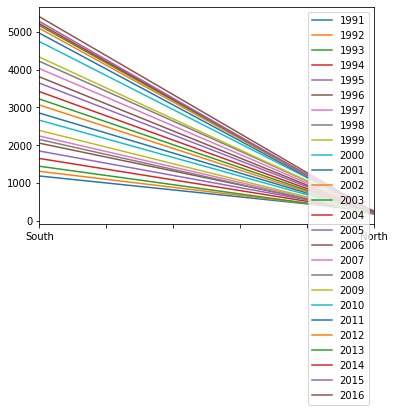

In [10]:
df_ns.plot( )

In [12]:
df_ns = df_ns.T
print(df_ns.head())

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230


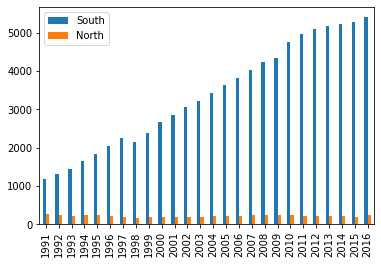

In [13]:
df_ns.plot(kind='bar')

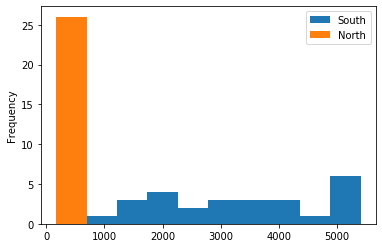

In [14]:
df_ns.plot(kind='hist')

In [19]:
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [20]:
df.columns =['mpg', 'cylinders', 'displacement', 'horsepower', 
             'weight', 'acceleration', 'model year', 'origin', 'name']

In [42]:
df.plot(x='weight', y='horsepower', kind='scatter')

KeyError: 'weight'

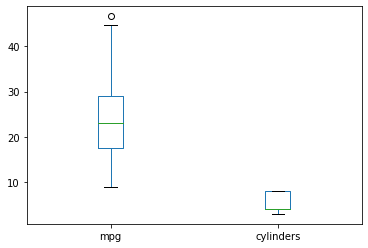

In [22]:
df[['mpg', 'cylinders']].plot(kind='box')

### matplotlib 라이브러리를 이용한 시각화

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [25]:
#시도별 전출입 인구수.xlsx파일을 결측치는 0으로 대체,  
#첫번째 행을 header로 데이터 프레임 생성
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', fillna=0, header=0)

In [26]:
#데이터 프레임의 데이터중 누락값을 찾아서 앞 행의 동일컬럼의 값으로 채웁니다.
df = df.fillna(method='ffill')

In [27]:
#서울에서 다른 지역으로 이동한 데이터만 추출합니다.
mask = (df['전출지별'] =='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
print(df_seoul)

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    18943    23406    

In [45]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']


# 그래프 사이즈 지정 
plt.figure(figsize=(14, 5))

#x축 눈금 라벨 회전
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)
#plt.plot(sr_one)

#마커 표시추가
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

#제목 추가
plt.title('서울->경기도 인구 이동')

#축 이름 
plt.xlabel('기간')
plt.ylabel('이동 인구수')

#범례
plt.legend(labels=['서울->경기'], loc='best')

#y축 범위 (최소값, 최대값) 지정
ylim(50000, 800000)


plt.annotate('' 
                xy=(20, 620000),    #화살표의 머리 끝점
                xytext(2, 290000),  #화살표의 꼬리 끝점
                xycoords='data',    #좌표체계
                arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)  #화살표 스타일
            )

plt.annotate('' 
                xy=(47, 450000),     #화살표의 머리 끝점
                xytext(30, 480000),  #화살표의 꼬리 끝점
                xycoords='data',     #좌표체계
                arrowprops=dict(arrowstyle='->', color='olive', lw=5)  #화살표 스타일
            )

plt.annotate('인구이동 증가 (1070~1995)' 
                xy=(10, 550000),   #텍스트 위치 기준점
                rotation=25 ,      #텍트스의 회전각
                va='baseline',     #텍스트의 상하정렬
                ha = 'center',     #텍스트의 좌우 정렬
                fontsize=15        #텍스트 크기
                )  


plt.show() 

SyntaxError: invalid syntax (<ipython-input-45-8de25728a0a6>, line 30)

https://python-graph-gallery.com/

### figure객체 사용 (하나의 그래프)

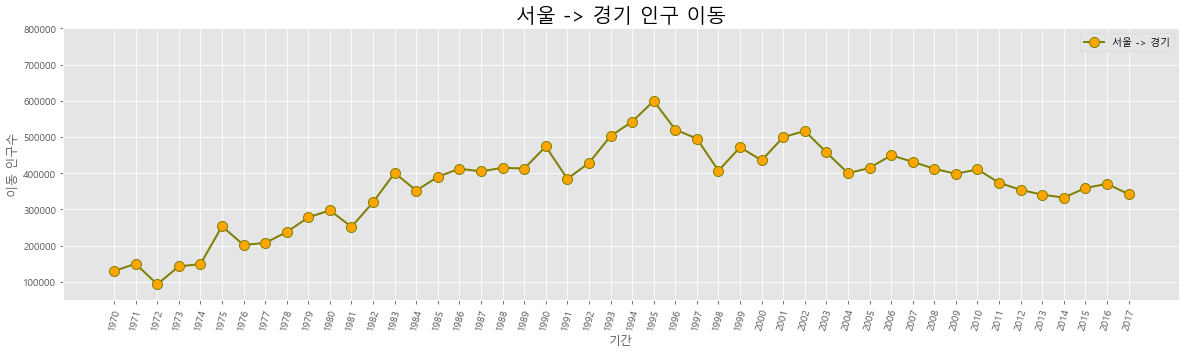

In [53]:
#시도별 전출입 인구수.xlsx파일을 결측치는 0으로 대체,  첫번째 행을 header로 데이터 프레임 생서
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', fillna=0, header=0)

#데이터 프레임의 데이터중 누락값을 찾아서 앞 행의 동일컬럼의 값으로 채웁니다.
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, 
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

### figure객체를 이용하여 2개의 서브 plot 그리기

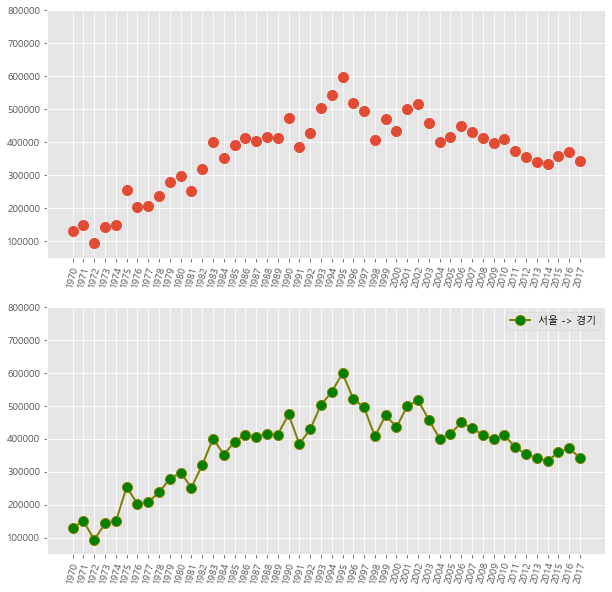

In [54]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))   
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, 
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show() 